In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df_cityride = pd.read_csv("Rides_Data.csv")

### Exploratory Data Analysis

In [23]:
df_cityride.describe()

,Ride_ID,Driver_ID,Distance_km,Duration_min,Fare,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,150.505000,25.264100,49.664000,44.580270,4.255800
std,288.819436,28.955213,13.923626,28.481367,32.825111,0.440341
min,1.000000,101.000000,1.000000,2.000000,0.920000,3.500000
25%,250.750000,126.000000,13.800000,26.000000,18.832500,3.900000
50%,500.500000,149.000000,25.250000,50.000000,35.440000,4.300000
75%,750.250000,175.000000,37.425000,72.000000,63.815000,4.600000
max,1000.000000,200.000000,49.800000,121.000000,140.410000,5.000000


In [46]:
df_cityride.sample()

,Ride_ID,Driver_ID,City,Date,Distance_km,Duration_min,Fare,Rating,Promo_Code
695,696,171,New York,11/21/2024,45.4,85,23.16,3.9,DISCOUNT10


In [40]:
# Unique values in each column

df_cityride.nunique()

Ride_ID         1000
Driver_ID        100
City               5
Date              30
Distance_km      429
Duration_min     114
Fare             952
Rating            16
Promo_Code         3
dtype: int64

In [7]:
df_cityride.head()

,Ride_ID,Driver_ID,City,Date,Distance_km,Duration_min,Fare,Rating,Promo_Code
0,1,110,Miami,11/11/2024,5.8,8,11.01,3.8,NaN
1,2,112,Los Angeles,11/19/2024,2.6,5,5.69,4.8,NaN
2,3,147,San Francisco,11/14/2024,4.6,8,8.95,4.5,WELCOME5
3,4,120,Chicago,11/12/2024,26.5,46,54.88,4.7,SAVE20
4,5,193,San Francisco,11/7/2024,15.9,26,20.45,4.2,DISCOUNT10


In [9]:
df_cityride.tail()

,Ride_ID,Driver_ID,City,Date,Distance_km,Duration_min,Fare,Rating,Promo_Code
995,996,189,Miami,11/6/2024,45.8,95,95.92,4.2,SAVE20
996,997,104,San Francisco,11/12/2024,4.8,10,4.91,4.5,NaN
997,998,108,New York,11/15/2024,44.8,99,72.22,3.7,DISCOUNT10
998,999,163,Miami,11/1/2024,44.7,93,114.69,4.4,WELCOME5
999,1000,187,Miami,11/27/2024,33.4,74,86.10,3.6,NaN


In [21]:
df_cityride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ride_ID       1000 non-null   int64  
 1   Driver_ID     1000 non-null   int64  
 2   City          1000 non-null   object 
 3   Date          1000 non-null   object 
 4   Distance_km   1000 non-null   float64
 5   Duration_min  1000 non-null   int64  
 6   Fare          1000 non-null   float64
 7   Rating        1000 non-null   float64
 8   Promo_Code    727 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [29]:
# check for duplicates
duplicates = df_cityride.duplicated()
print(f"Number of duplicates rows: {duplicates.sum()}")

Number of duplicates rows: 0


In [38]:
# Check for missing values
df_cityride.isnull().sum()

Ride_ID           0
Driver_ID         0
City              0
Date              0
Distance_km       0
Duration_min      0
Fare              0
Rating            0
Promo_Code      273
dtype: int64

### Distribution Analysis

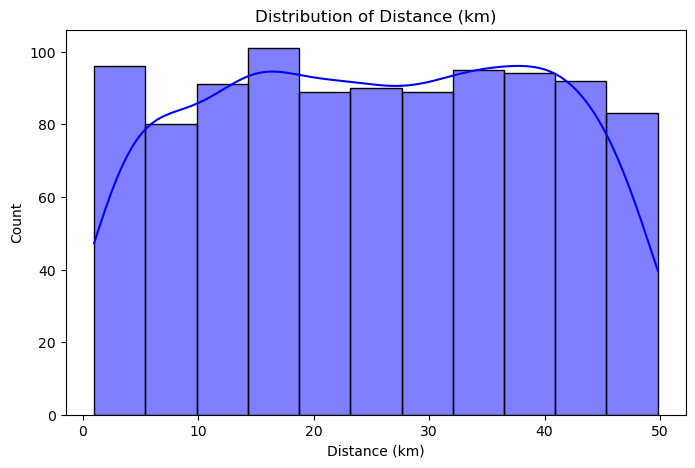

In [45]:
# Distribution of distance

plt.figure(figsize=(8,5))
sns.histplot(df_cityride['Distance_km'], kde=True, color='blue')
plt.title('Distribution of Distance (km)')
plt.xlabel('Distance (km)')
plt.show()

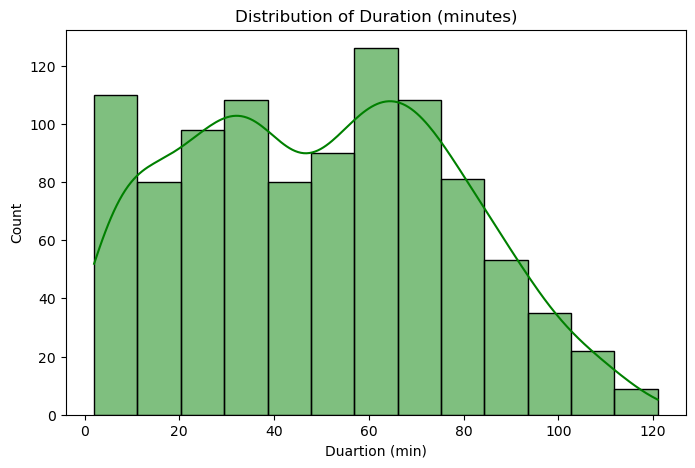

In [47]:
# Distribution of duration

plt.figure(figsize=(8,5))
sns.histplot(df_cityride['Duration_min'], kde=True, color='green')
plt.title('Distribution of Duration (minutes)')
plt.xlabel('Duartion (min)')
plt.show()

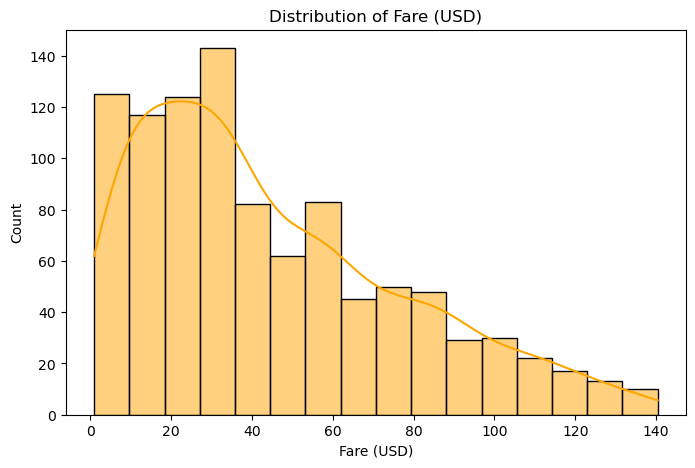

In [49]:
# Distribution of fare

plt.figure(figsize=(8,5))
sns.histplot(df_cityride['Fare'], kde=True, color='orange')
plt.title('Distribution of Fare (USD)')
plt.xlabel('Fare (USD)')
plt.show()

In [23]:
# Unique values in 'rating'

print("\nUnique Ratings:")
print(df_cityride['Rating'].unique())
# e.g of summary of 'fare'
print("\nFare Summary")




Unique Ratings:
[3.8 4.8 4.5 4.7 4.2 4.9 3.7 4.  4.3 3.9 4.6 4.4 3.5 3.6 4.1 5. ]

Fare Summary


### Relationships Between Features

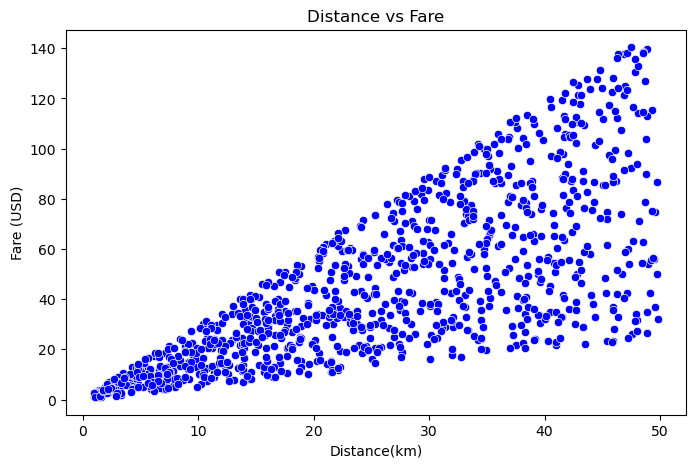

In [34]:
# Scatter plot: Distance vs Fare

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cityride['Distance_km'], y=df_cityride['Fare'], color = 'blue')
plt.title('Distance vs Fare')
plt.xlabel('Distance(km)')
plt.ylabel('Fare (USD)')
plt.show()


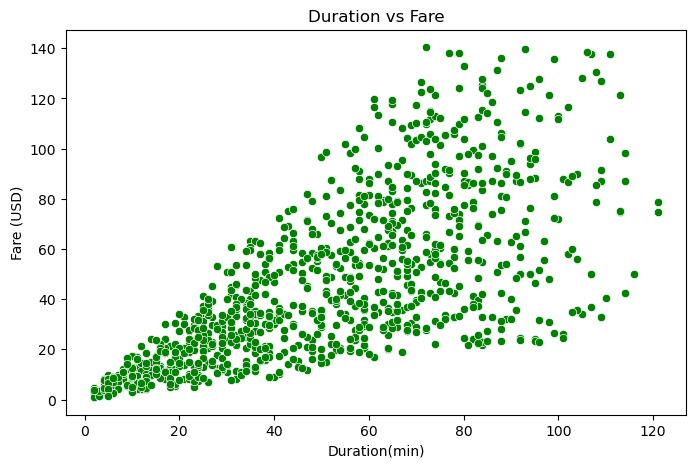

In [36]:
# Scatter plot: Duration vs Fare

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cityride['Duration_min'], y=df_cityride['Fare'], color = 'green')
plt.title('Duration vs Fare')
plt.xlabel('Duration(min)')
plt.ylabel('Fare (USD)')
plt.show()


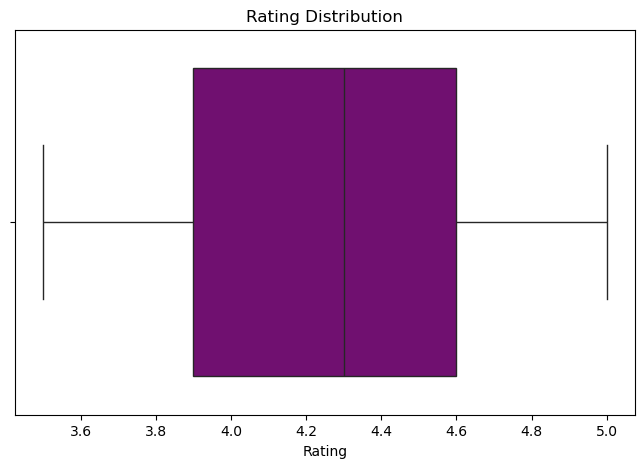

In [40]:
# Box plot: Rating Distribution by Drivers

plt.figure(figsize=(8,5))
sns.boxplot(x= 'Rating', data= df_cityride, color='purple')
plt.title('Rating Distribution')
plt.show()

### Detecting Outliers

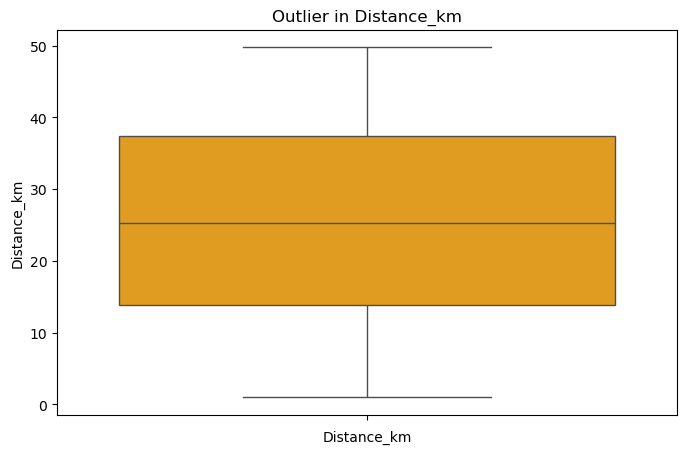

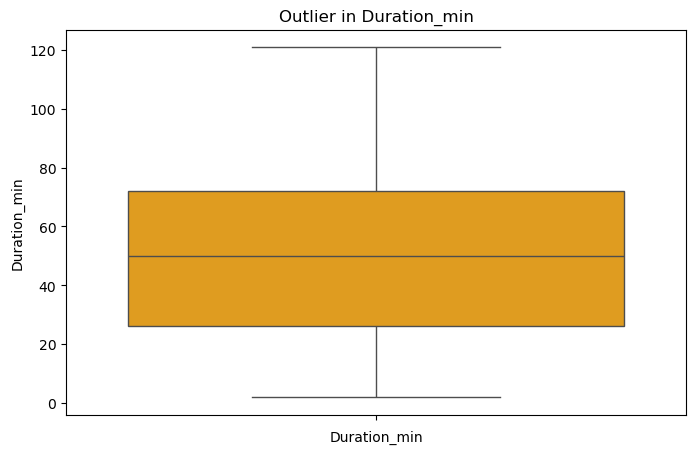

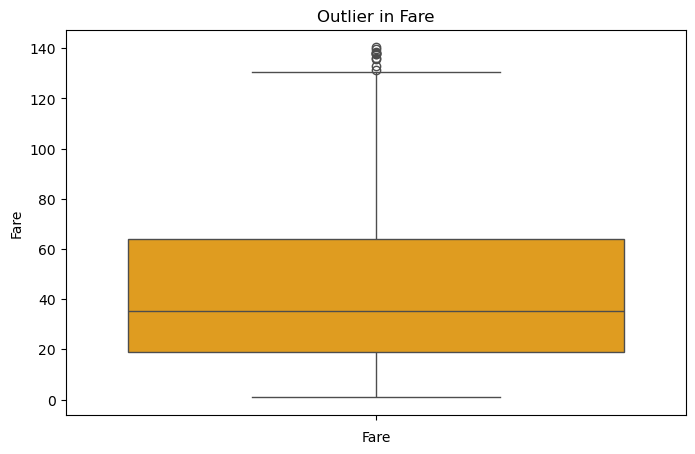

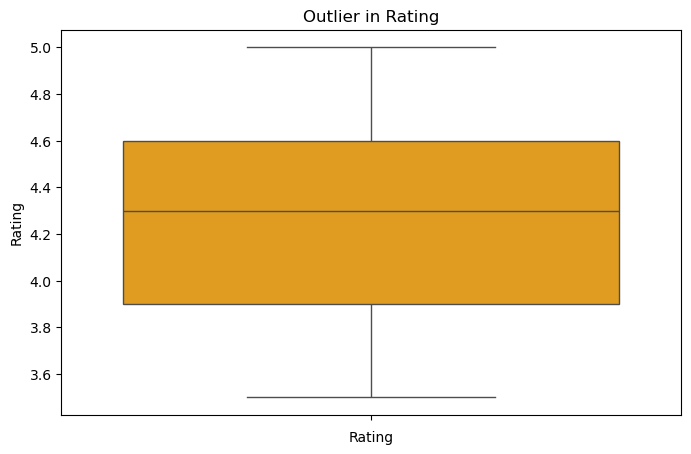

In [44]:
# Box plot to detect outliers in numerical columns

numerical_columns = ['Distance_km', 'Duration_min', 'Fare', 'Rating']

for col in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_cityride[col], color='orange')
    plt.title(f'Outlier in {col}')
    plt.xlabel(col)
    plt.show()

### Driver Performance: Identity Driverwith Low Ratings or Poor Performance 

In [67]:
# group by 'driver_id' and calculate the average rating for each driver

driver_ratings = df_cityride.groupby('Driver_ID')['Rating'].mean()

# Set a threshold for low performance (e.g.rating <3.0)

low_rated_drivers = driver_ratings[driver_ratings < 3.0]

# Display drivers with consistentlylow rate

print("Drivers with low ratings:")
print("low_rated_drivers")



Drivers with low ratings:
low_rated_drivers


### Fare Analysis: Average Fare Per Kilometer or Minute

In [76]:
# Create new columns for fare per per kilometer and fare per minute

df_cityride['fare_per_km'] = df_cityride['Fare'] / df_cityride['Distance_km']
df_cityride['fare_per_min'] = df_cityride['Fare'] / df_cityride['Duration_min']

# Calculate the overall averages

avg_fare_per_km = df_cityride['fare_per_km'].mean()
avg_fare_per_min = df_cityride['fare_per_min'].mean()

print(f"Average fare per kilometer: {avg_fare_per_km: .2f} USD")
print(f"Average fare per minute: {avg_fare_per_min: .2f} USD")

# Group by 'driver_id' to see variation among drivers

fare_by_driver = df_cityride.groupby('Driver_ID')[['fare_per_km', 'fare_per_min']].mean()
print(fare_by_driver)

Average fare per kilometer:  1.76 USD
Average fare per minute:  0.92 USD
           fare_per_km  fare_per_min
Driver_ID                           
101           1.476762      0.718354
102           1.821344      0.920045
103           1.600095      0.801597
104           1.779604      0.939084
105           2.017811      1.178892
...                ...           ...
196           1.738625      0.961201
197           1.675961      0.901429
198           1.409318      0.794178
199           1.673175      0.950261
200           1.834175      0.986626

[100 rows x 2 columns]


### Visualize driver ratings

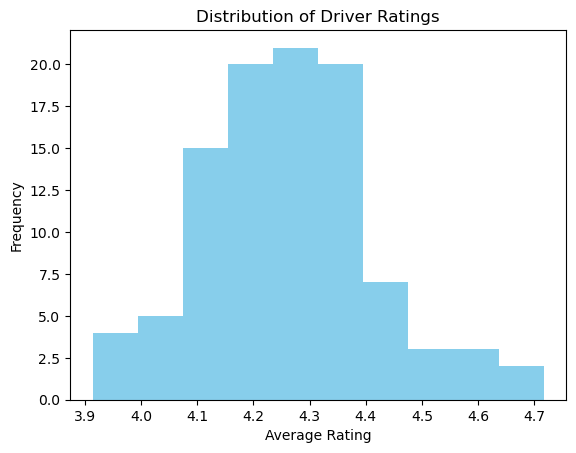

In [79]:
driver_ratings.plot(kind='hist', bins=10, title='Distribution of Driver Ratings', color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

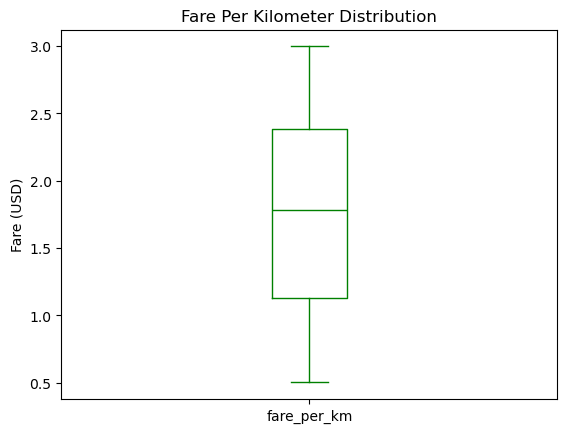

In [83]:
# Visualize fare per kilometer
df_cityride['fare_per_km'].plot(kind='box', title='Fare Per Kilometer Distribution', color='green')
plt.ylabel('Fare (USD)')
plt.show()